# Exponential Smoothing

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
from sklearn.metrics import mean_squared_error

def calculate_rmse(y_true, y_pred):
    """
    Calculate the Root Mean Squared Error (RMSE)  
    """ 
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [3]:
stock_cleaned_data=pd.read_csv('../data/stock_cleaned_data.csv', index_col = 0)
stock_cleaned_data.head()

,open,high,low,close,adjclose,volume
date,,,,,,
1999-11-01,136.500000,137.000000,135.562500,135.562500,88.217185,4006500
1999-11-02,135.968704,137.250000,134.593704,134.593704,87.586742,6516900
1999-11-03,136.000000,136.375000,135.125000,135.500000,88.176513,7222300
1999-11-04,136.750000,137.359299,135.765594,136.531204,88.847568,7907500
1999-11-05,138.625000,139.109299,136.781204,137.875000,89.722043,7431500


**Exponential smoothing without trend**

In [8]:
data=stock_cleaned_data.filter(['close'])
dataset=data.values
train_data_len = math.ceil(len(dataset)*.8)
test_data_len=len(dataset) - train_data_len
print("testing data size:", test_data_len)
train_data = dataset[:train_data_len, :]
test_data = dataset[-test_data_len:, : ]

testing data size: 1180


In [9]:
alpha_grid = np.linspace(0,1,1001)

In [124]:
minimal = 100
saved_alpha = 0
for alpha in alpha_grid:
    ES_pred = [float(train_data[0])]

    for i in range(1, train_data_len):
        ES_pred.append(float(alpha * train_data[i-1] + (1 - alpha) * ES_pred[i-1]))
    
    if minimal > calculate_rmse(train_data, ES_pred):
        minimal = calculate_rmse(train_data, ES_pred)
        saved_alpha = alpha
        saved_ES_pred = ES_pred
        
print("optimal alpha\t:", saved_alpha)
print("training RMSE\t:", minimal)

optimal alpha	: 0.9420000000000001
training RMSE	: 1.5460774333219414


In [125]:
alpha = saved_alpha

ES_test_pred = [float(test_data[0])]

for i in range(1, test_data_len):
    ES_test_pred.append(float(alpha * test_data[i-1] + (1 - alpha) * ES_test_pred[i-1]))
    
print("testing RMSE\t:", calculate_rmse(test_data, ES_test_pred))

testing RMSE	: 4.598907266468322


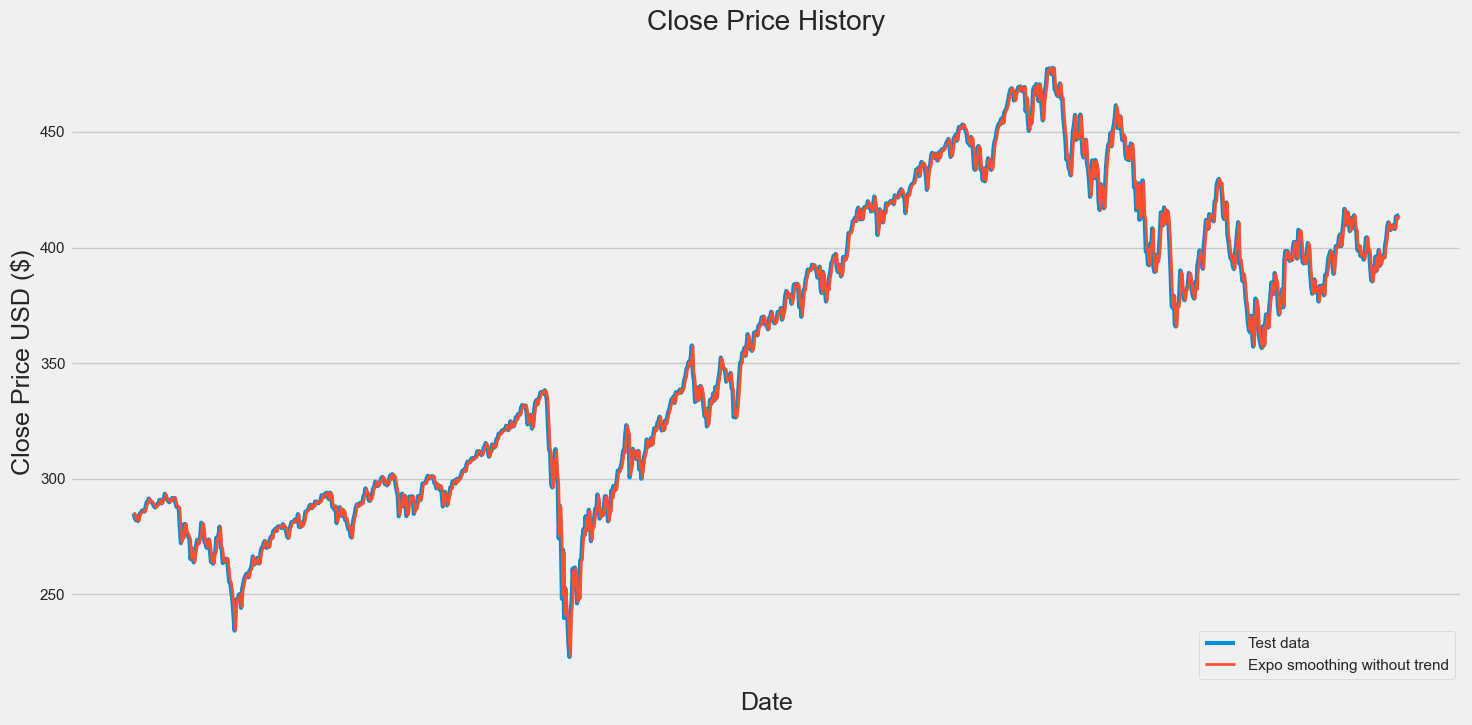

In [126]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(test_data, linewidth=3)
plt.plot(ES_test_pred, linewidth=2)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.legend(['Test data', 'Expo smoothing without trend'],loc='lower right')
plt.xticks([])
plt.show()

**Exponential smoothing with trend**

In [12]:
alpha_grid = np.linspace(0,1,1001)
beta_grid = np.linspace(0,1,101)

In [13]:
minimal = 100
saved_alpha = 0
saved_beta = 0

for alpha in alpha_grid:
    for beta in beta_grid:
        B = [float(train_data[0])]
        T = [float(train_data[1] - train_data[0])]
        ES_trend_pred = [float(train_data[0])]

        for i in range(1, train_data_len):
            B.append(float(alpha * train_data[i-1] + (1 - alpha) * ES_trend_pred[i-1]))
            T.append(float(beta * float(B[i] - B[i-1]) + (1 - beta) * float(T[i-1])))
            ES_trend_pred.append(float(B[i] + T[i]))
        
        if minimal > calculate_rmse(train_data, ES_trend_pred):
            minimal = calculate_rmse(train_data, ES_trend_pred)
            saved_alpha = alpha
            saved_beta = beta
            saved_ES_trend_pred = ES_trend_pred
            
print("Optimal alpha\t:", saved_alpha)
print("Optimal beta\t:", saved_beta)
print("training RMSE\t:", minimal)

Optimal alpha	: 0.9430000000000001
Optimal beta	: 0.01
training RMSE	: 1.5540022338583932


In [36]:
alpha = saved_alpha
beta = saved_beta

B = [float(test_data[0])]
T = [float(test_data[1] - test_data[0])]
ES_trend_test_pred = [float(test_data[0])]

for i in range(1, test_data_len):
    B.append(float(alpha * test_data[i-1] + (1 - alpha) * ES_trend_test_pred[i-1]))
    T.append(float(beta * float(B[i] - B[i-1]) + (1 - beta) * float(T[i-1])))
    ES_trend_test_pred.append(float(B[i] + T[i]))

print("testing RMSE\t:", calculate_rmse(test_data, ES_trend_test_pred))

testing RMSE	: 4.630746278848413


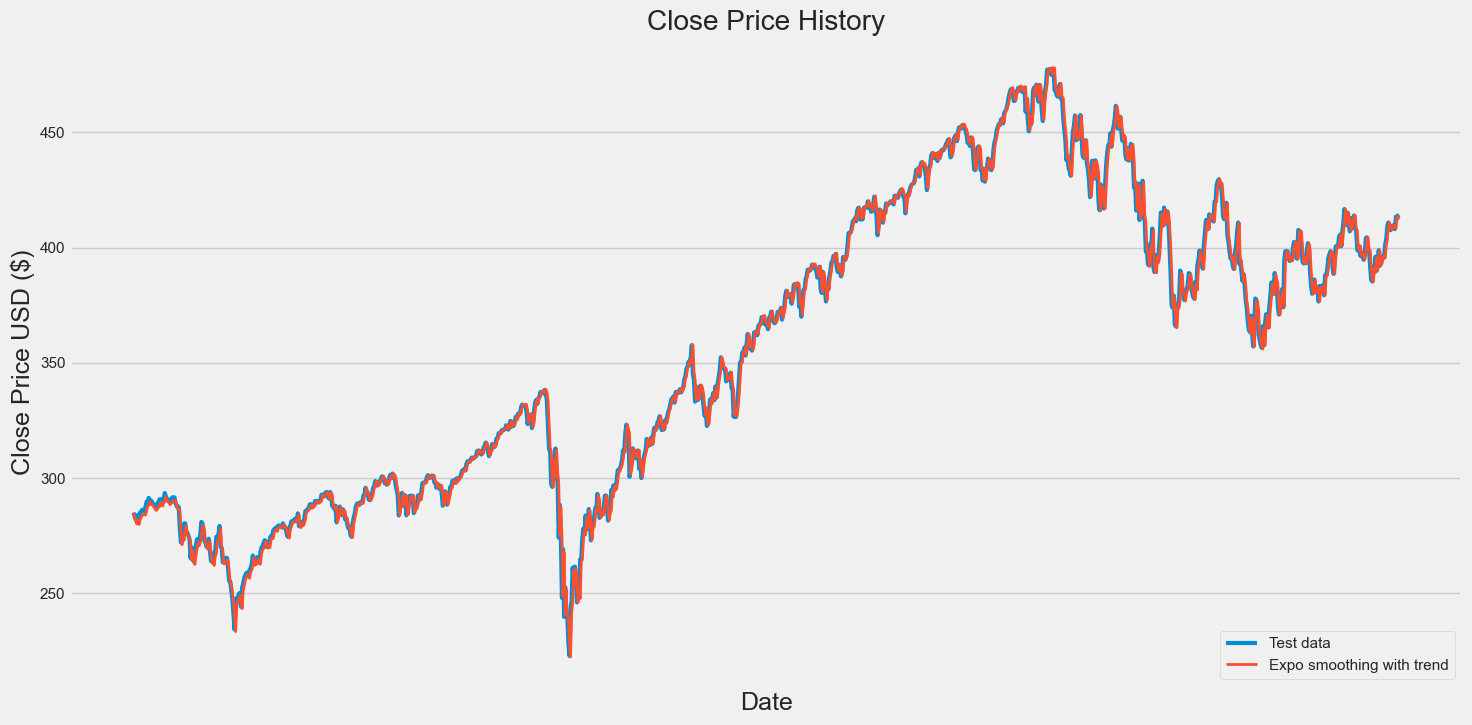

In [37]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(test_data, linewidth=3)
plt.plot(ES_trend_test_pred, linewidth=2)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.legend(['Test data', 'Expo smoothing with trend'],loc='lower right')
plt.xticks([])
plt.show()